In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config IPCompleter.greedy=True

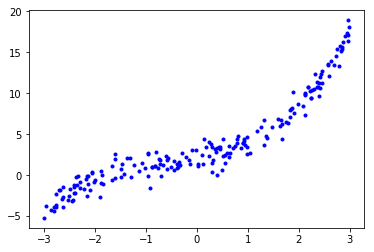

In [304]:
#Create some data. Creating a 3rd degree function

m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.3 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, 'b.')

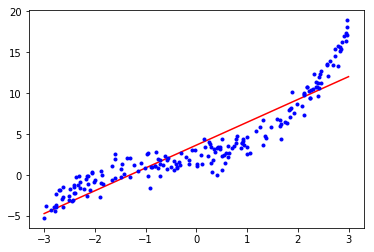

In [305]:
lin_reg_lin = LinearRegression()
lin_reg_lin.fit(X, y)

x_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lin_reg_lin.predict(x_new)

plt.plot(x_new, y_new, 'r-')
plt.plot(X, y, 'b.')

In [306]:
#adding polynomial features manually

def poly_features(X, degree=2):
    
    x_poly = []

    for row in X[:]:
        row_poly = row.tolist()
        for n in row[:]:
            for d in range(2, degree + 1):
                row_poly.append(n**d)
        x_poly.append(row_poly)
    return x_poly
    
x_poly = poly_features(X, 2)
    
print (X[1:3])
print (x_poly[1:3])


[[-2.62636293]
 [-1.66992571]]
[[-2.6263629320315935, 6.8977822507495885], [-1.6699257058711123, 2.7886518631291328]]


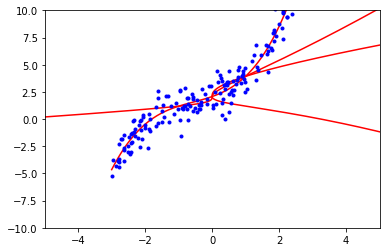

In [307]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)

y_new_poly = lin_reg_poly.predict(X_new_poly)

plt.axis([-5, 5, -10, 10])
plt.plot(X_new_poly, y_new_poly, 'r-')
plt.plot(X, y, 'b.')


In [308]:
#Best theta. original polynomial (b + 0.3*x^3 + 0.5*x^2 + x)

lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([ 2.07154365]), array([[ 1.08235493,  0.48794198,  0.29136355]]))

In [273]:
#Plot learning curve. see the training and validation error as the number 
#of training examples increases. For each batch of increasing training examples,
#fit the model and see train/validation error

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 170, 0, 6])

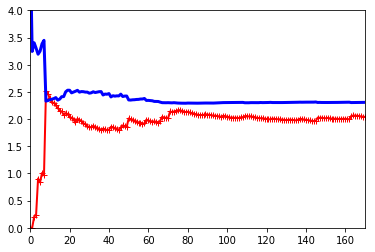

In [289]:
#Underfitting model (degree = 1 features for a 3rd degree polynomial)

lin_reg_test = LinearRegression()
plot_learning_curves(lin_reg_test, X, y)
plt.show()

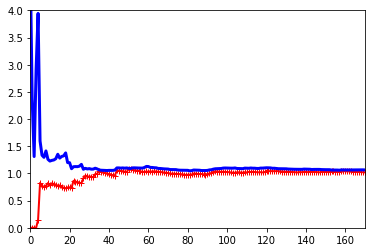

In [290]:
#just right model

lin_reg_test = LinearRegression()
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_test = poly_features.fit_transform(X)

plot_learning_curves(lin_reg_test, X_poly_test, y)

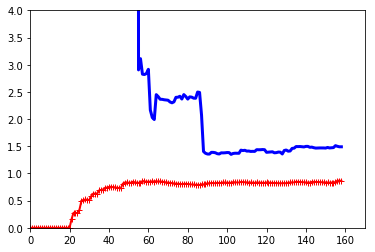

In [318]:
#overfitting model (degree = 20 features for a 3rd degree polynomial)

lin_reg_test = LinearRegression()
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly_test = poly_features.fit_transform(X)

plot_learning_curves(lin_reg_test, X_poly_test, y)